# Inferenza

In [1]:
import os
import pathlib

import matplotlib
import matplotlib.pyplot as plt

import io
import scipy.misc
import numpy as np
from six import BytesIO
from PIL import Image, ImageDraw, ImageFont
from six.moves.urllib.request import urlopen

import tensorflow as tf
import tensorflow_hub as hub

tf.get_logger().setLevel('ERROR')
print(tf.__version__)

2.5.0


In [13]:
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils
from object_detection.utils import ops as utils_ops

%matplotlib inline

In [7]:
print('Loading model...', end='')
# Load saved model and build the detection function
detector=tf.saved_model.load(PATH_TO_SAVED_MODEL)
print('Done!')

Loading model...Done!


## Caricamento della mappa delle etichette

In [8]:
category_index=label_map_util.create_category_index_from_labelmap(PATH_TO_WORKSPACE+"/annotations/label_map.pbtxt",use_display_name=True)
print(category_index)

{1: {'id': 1, 'name': 'person'}, 2: {'id': 2, 'name': 'bicycle'}, 3: {'id': 3, 'name': 'car'}, 17: {'id': 17, 'name': 'dog'}}


## Caricamento delle immagini

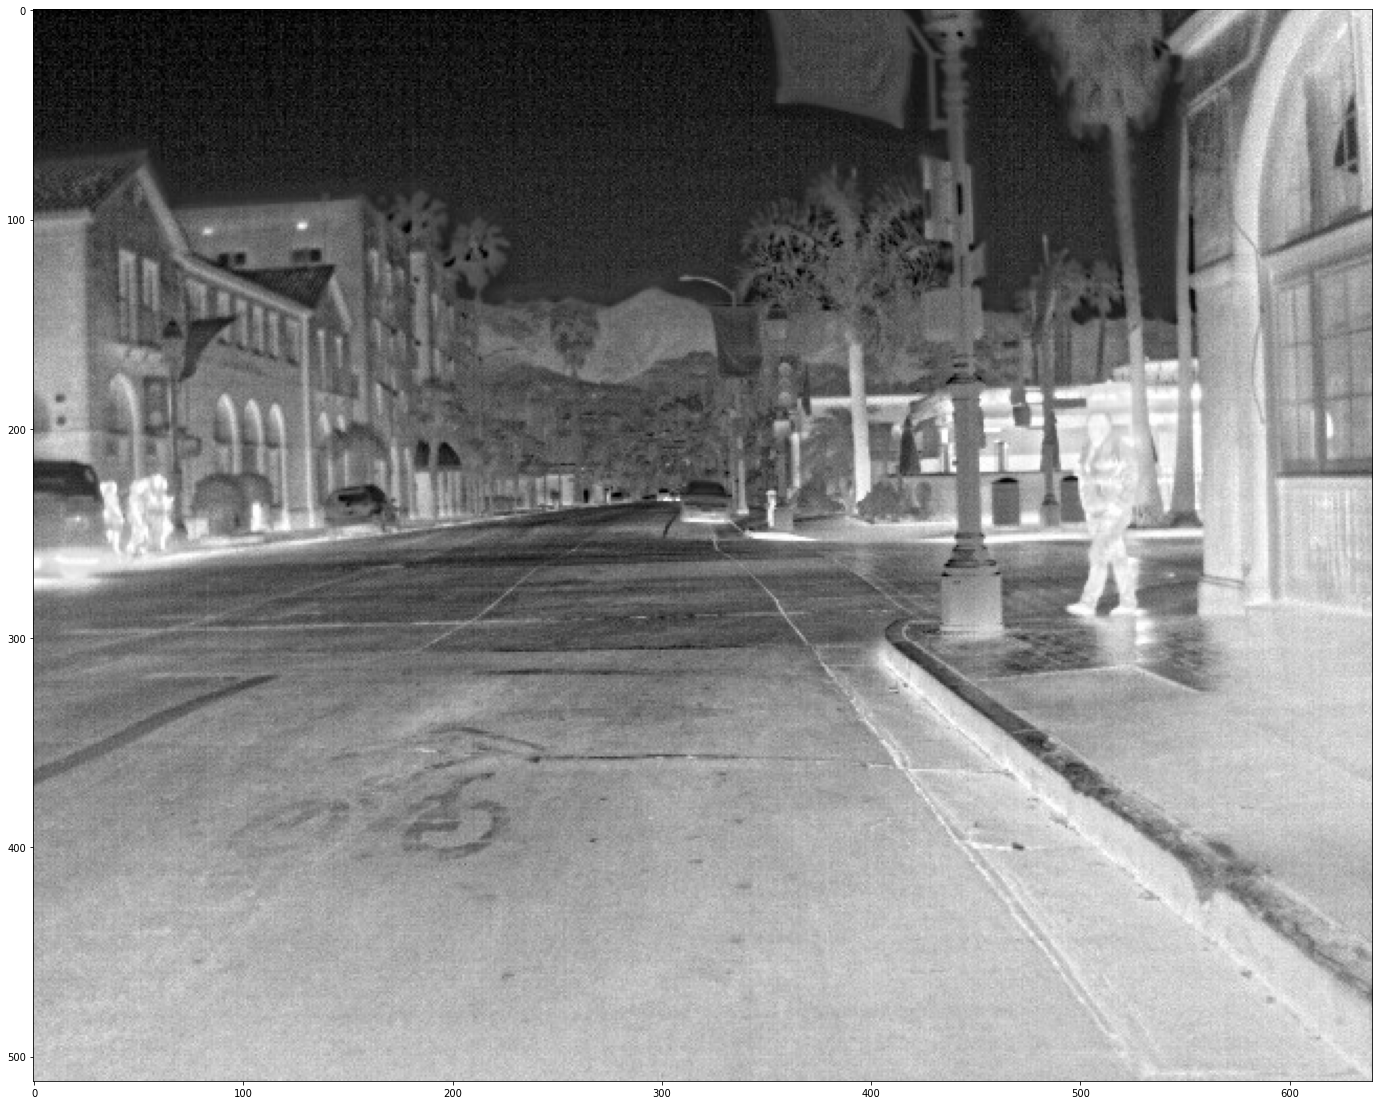

In [14]:
image_path='images/val/thermal_8_bit/FLIR_08881.jpeg'

image = tf.keras.preprocessing.image.load_img(image_path)
im_width, im_height = image.size
input_arr = tf.keras.preprocessing.image.img_to_array(image)

image_np = np.array(input_arr).reshape(
      (1, im_height, im_width, 3)).astype(np.uint8)

plt.figure(figsize=(24,32))
plt.imshow(image_np[0])
plt.show()

## Risultati


In [10]:
results = detector(image_np)

In [15]:
result = {key:value.numpy() for key,value in results.items()}
print(result.keys())

dict_keys(['detection_boxes', 'detection_multiclass_scores', 'detection_scores', 'raw_detection_boxes', 'num_detections', 'detection_classes', 'raw_detection_scores', 'detection_anchor_indices'])


##Visualizzazione delle Bounding Box

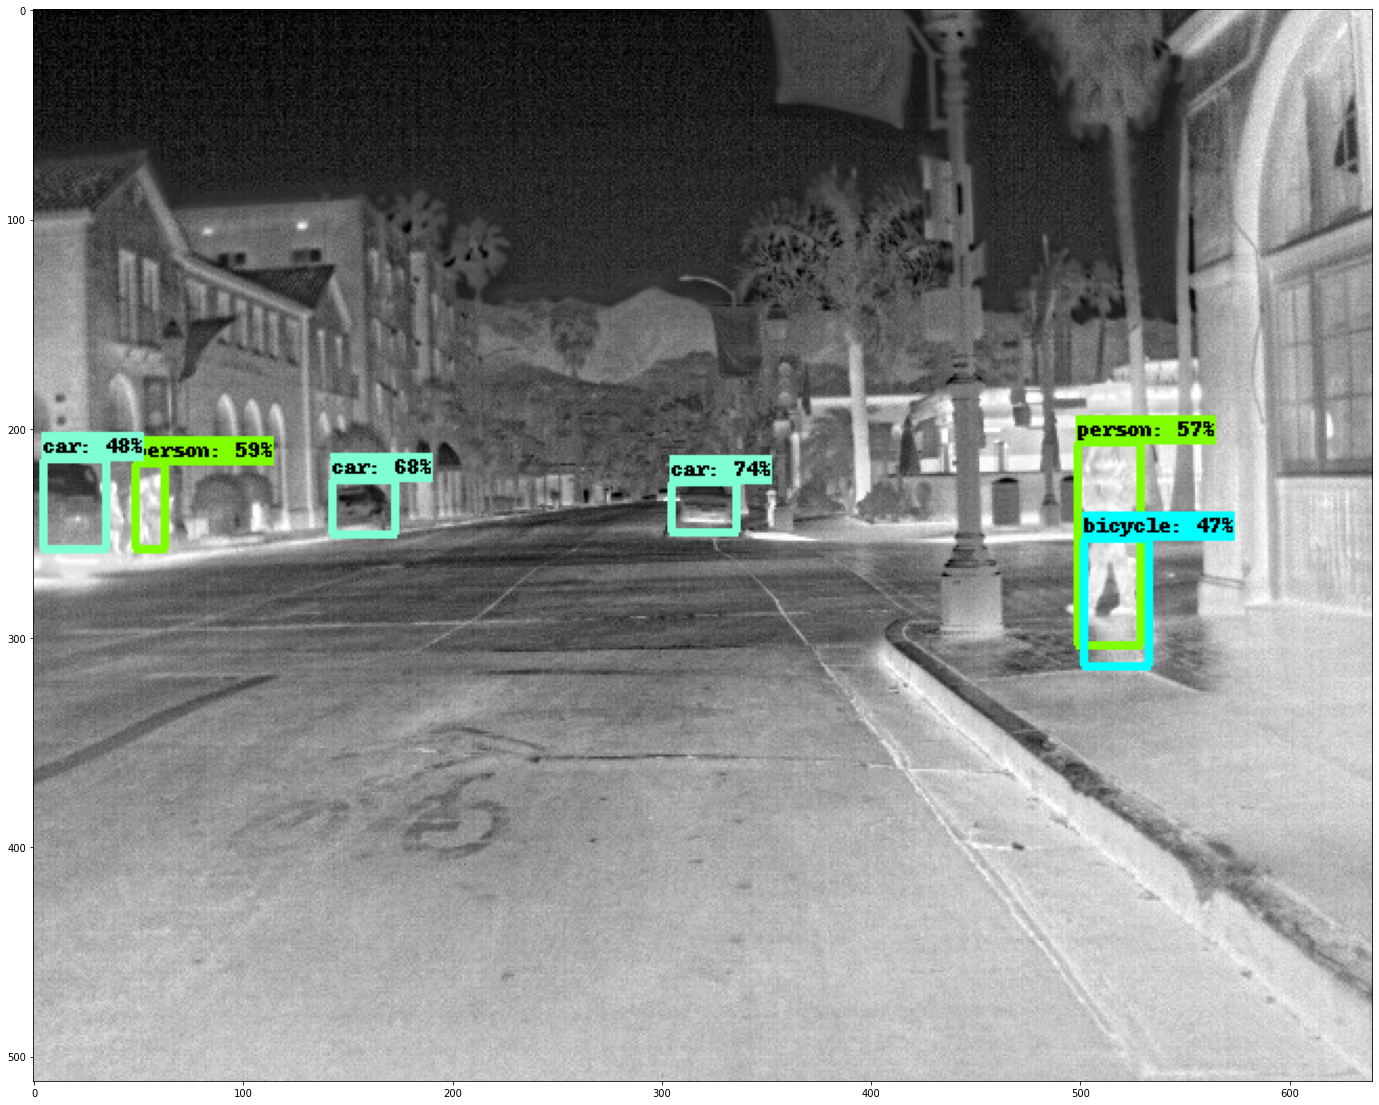

In [16]:
label_id_offset = 0
image_np_with_detections = image_np.copy()


viz_utils.visualize_boxes_and_labels_on_image_array(
      image_np_with_detections[0],
      result['detection_boxes'][0],
      (result['detection_classes'][0] + label_id_offset).astype(int),
      result['detection_scores'][0],
      category_index,
      use_normalized_coordinates=True,
      max_boxes_to_draw=200,
      min_score_thresh=.40,
      agnostic_mode=False)

plt.figure(figsize=(24,32))
plt.imshow(image_np_with_detections[0])
plt.show()